# Text Processing 

In [ ]:
paragraph = """
One Piece (stylized in all caps) is a Japanese anime television series produced by Toei Animation that premiered on Fuji TV in October 1999. It is based on Eiichiro Oda's manga series of the same name. The story follows the adventures of Monkey D. Luffy, a boy whose body gained the properties of rubber after unintentionally eating a Devil Fruit. With his crew, named the Straw Hat Pirates, Luffy explores the Grand Line in search of the world's ultimate treasure known as the "One Piece" in order to become the next Pirate King.
"""

In [ ]:
# Importing library for Text Preprocessing

import nltk
from nltk.stem import PorterStemmer  # Used for stemming process
from nltk.corpus import stopwords

In [ ]:
# tokenization -> It converts paragraph->sentences->words
sentences=nltk.sent_tokenize(paragraph) # used to convert paragraph into sentences

In [ ]:
from nltk.stem import WordNetLemmatizer # Used for lemmatization process

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
import re 
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]',' ',sentences[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
# applying bag of words(bow)

from sklearn.feature_extraction.text import CountVectorizer

# making bow to binary bow by adding binary = true 
# applying n-grams
cv = CountVectorizer(binary = True, ngram_range=(2,3)) 

In [ ]:
X = cv.fit_transform(corpus)

In [ ]:
cv.vocabulary_

In [ ]:
X.toarray()

In [ ]:
## Applying TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(3,3),max_features=10)
X = cv.fit_transform(corpus)

In [ ]:
X.toarray()

# Word2Vec

if the dataset is large use skipgram otherwise cbow

In [ ]:
!pip install gensim

In [4]:
import gensim

In [5]:
from gensim.models import Word2Vec, KeyedVectors

In [7]:
import gensim.downloader as api

print("Starting download...")
wv = api.load('word2vec-google-news-300')
print("Download completed")

vec_king = wv['king']
print("Vector for 'king' obtained")

Starting download...
Download completed
Vector for 'king' obtained


In [8]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [9]:
wv.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [10]:
wv.most_similar('king')

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [11]:
wv.similarity('coder','programmer') # calculating cosine similarity between coder and programmer

0.61133546

In [12]:
vec = wv['king'] - wv['man'] + wv['woman']
wv.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [13]:
# WordCloud Representation

import os

from os import path
from wordcloud import WordCloud

In [14]:
text = """
One Piece (stylized in all caps) is a Japanese anime television series produced by Toei Animation that premiered on Fuji TV in October 1999. It is based on Eiichiro Oda's manga series of the same name. The story follows the adventures of Monkey D. Luffy, a boy whose body gained the properties of rubber after unintentionally eating a Devil Fruit. With his crew, named the Straw Hat Pirates, Luffy explores the Grand Line in search of the world's ultimate treasure known as the "One Piece" in order to become the next Pirate King.
"""

In [15]:
# Generate a word cloud image
wordcloud  = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

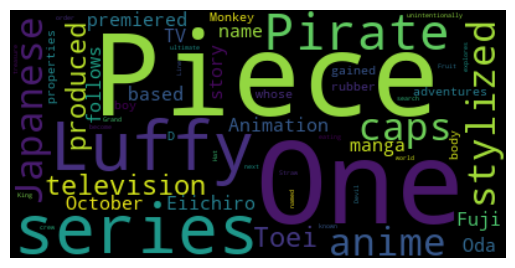

In [16]:
# Display the generated image in matplotlib way

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

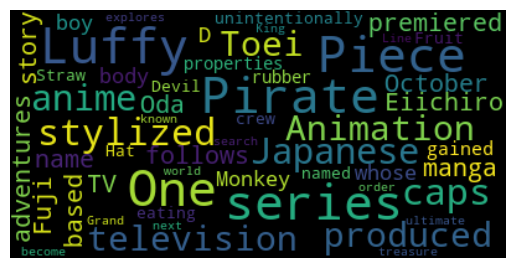

In [17]:
# lower max_font_size

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()